# 6.5: Unsupervised Machine Learning: Clustering
#### Importing libraries and data and renaming columns
#### The elbow technique
#### k-means clustering


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [63]:
path=r'C:\Users\banda\Chocolate'

In [64]:
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_clean2.csv'))

In [65]:
df_contient=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocoalate_clean_withcontinent.csv'))

In [66]:
df.head()

,Unnamed: 0,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Rating Flag,Year
0,0,A. Morin,Agua Grande,1876,2024-02-18,0.63,France,3.75,NaN,Sao Tome,High rating,2024
1,1,A. Morin,Kpime,1676,2024-02-18,0.70,France,2.75,NaN,Togo,Mid rating,2024
2,2,A. Morin,Atsane,1676,2024-02-18,0.70,France,3.00,NaN,Togo,Mid rating,2024
3,3,A. Morin,Akata,1680,2024-02-18,0.70,France,3.50,NaN,Togo,High rating,2024
4,4,A. Morin,Quilla,1704,2024-02-18,0.70,France,3.50,NaN,Peru,High rating,2024


In [67]:
##Drop unnamed columns in df
df = df.drop(columns = ['Unnamed: 0'])

In [68]:
df_contient.head()

,Unnamed: 0,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Rating Flag,Year,Continent
0,0,A. Morin,Agua Grande,1876,2024-02-18,0.63,France,3.75,NaN,Sao Tome,High rating,2024,Europe
1,1,A. Morin,Kpime,1676,2024-02-18,0.70,France,2.75,NaN,Togo,Mid rating,2024,Europe
2,2,A. Morin,Atsane,1676,2024-02-18,0.70,France,3.00,NaN,Togo,Mid rating,2024,Europe
3,3,A. Morin,Akata,1680,2024-02-18,0.70,France,3.50,NaN,Togo,High rating,2024,Europe
4,4,A. Morin,Quilla,1704,2024-02-18,0.70,France,3.50,NaN,Peru,High rating,2024,Europe


In [69]:
##Drop unnamed columns in df
df_contient = df_contient.drop(columns = ['Unnamed: 0'])

In [70]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [71]:
df.shape

(1793, 11)

In [72]:
df_contient.shape

(1793, 12)

In [73]:
sub_df=df[['Cocoa_Percent', 'Rating']]

In [74]:
sub_df.head()

,Cocoa_Percent,Rating
0,0.63,3.75
1,0.70,2.75
2,0.70,3.00
3,0.70,3.50
4,0.70,3.50


In [75]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [76]:
score = [kmeans[i].fit(sub_df).score(sub_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\banda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\banda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\banda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\banda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-416.0465355549359,
 -148.680121527925,
 -87.66999268986017,
 -55.58864347223754,
 -36.15499518841539,
 -25.983378361663917,
 -19.25258497224713,
 -14.340398970727074,
 -10.410391195783761]

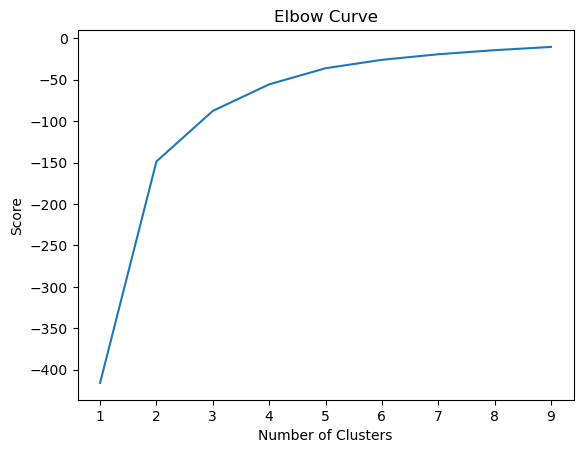

In [77]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [80]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [83]:
# Fit the k-means object to the data.

kmeans.fit(sub_df)

C:\Users\banda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\banda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3)

In [84]:
sub_df['clusters'] = kmeans.fit_predict(sub_df)

C:\Users\banda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\banda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\banda\AppData\Local\Temp\ipykernel_49512\1197835119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['clusters'] = kmeans.fit_predict(sub_df)


In [85]:
sub_df.head()

,Cocoa_Percent,Rating,clusters
0,0.63,3.75,2
1,0.70,2.75,1
2,0.70,3.00,0
3,0.70,3.50,2
4,0.70,3.50,2


In [86]:
sub_df['clusters'].value_counts()

clusters
2    701
0    644
1    448
Name: count, dtype: int64

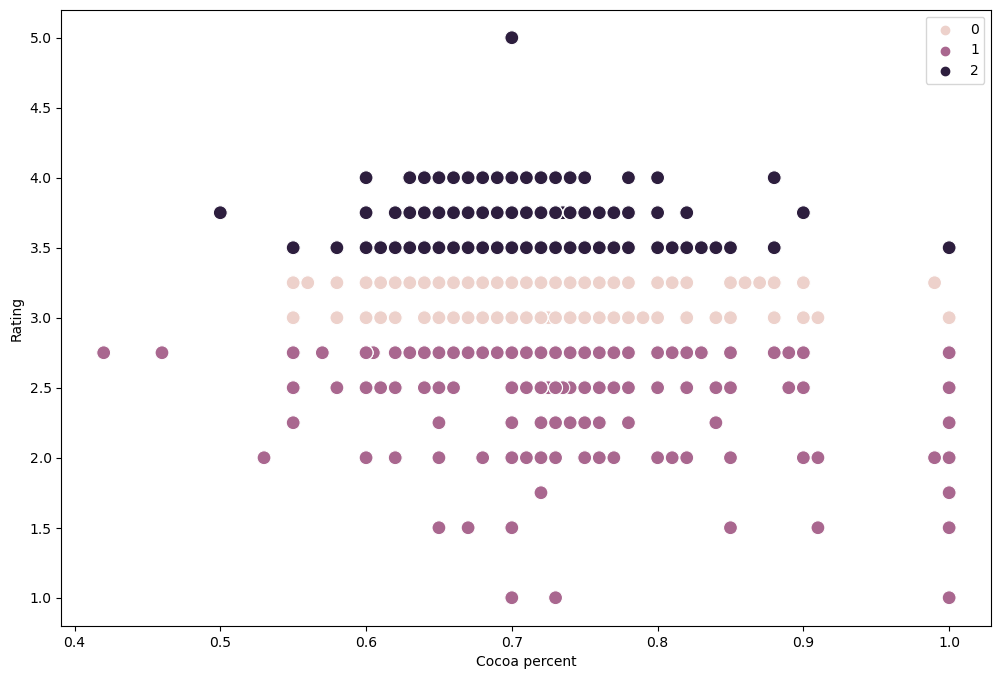

In [87]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cocoa_Percent'], y=sub_df['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

dark (black) cluster representing the highest count cluster of rating where cocoa perenthage arounf 55%-90% with outlier of few on 100 cocoa percent and 40%. The purple (1) representing lesser cluster than (2) of rating in similar cocoa pervaent but rating (1-2.25 and 3.75-4), than the last one with the smallest cluster of 3.5 rating with similar cocoa percent. 
non-linear dependency.

In [92]:
df.loc[sub_df['clusters'] == 2, 'cluster'] = 'Black'
df.loc[sub_df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[sub_df['clusters'] == 0, 'cluster'] = 'pink'

In [93]:
df.groupby('cluster').agg({'Cocoa_Percent':['mean', 'median'], 
                         'Rating':['mean', 'median']})

Cocoa_Percent           Rating       
                 mean median      mean median
cluster                                      
Black        0.710164   0.70  3.648359   3.50
pink         0.716040   0.70  3.117624   3.00
purple       0.729040   0.72  2.560268   2.75


It can be concluded that the cocoa percentage does not show a notable pattern within any of the colored clusters.
While this analysis may not provide extensive insights for my project, I have used the two numerical variables in this analysis. Further exploration and analysis will be conducted to gain a deeper understanding of the dataset.